# Описание датасета

Датасет представлен файлом csv, в котором 336 776 строк и 13 столбцов, содержащих

- `year, month, day`: date of departure;
- `dep_time, arr_time`: actual departure and arrival times (format HHMM or HMM), local timezone;
- `dep_delay, arr_delay`: departure and arrival delays, in minutes. Negative times represent early departures/arrivals;
- `carrier`: two letter carrier abbreviation;
- `flight`: flight number;
- `tailnum`: plane tail number;
- `origin, dest`: origin and destination airports;
- `air_time`: amount of time spent in the air, in minutes;
- `distance`: distance between origin and destination airports.

(Справочно) Аббревиатуры аэропортов Нью-Йорка:

JFK – John F. Kennedy International Airport;

LGA – LaGuardia Airport;

EWR – Newark International Airport.


In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, expon
from scipy.stats import linregress

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel('data.xlsx')
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_time   328521 non-null  float64
 4   dep_delay  328521 non-null  float64
 5   arr_time   328063 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    336776 non-null  object 
 8   tailnum    334264 non-null  object 
 9   flight     336776 non-null  int64  
 10  origin     336776 non-null  object 
 11  dest       336776 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   336776 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 36.0+ MB


In [4]:
df.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance
count,336776.0,336776.000000,336776.000000,328521.000000,328521.000000,328063.000000,327346.000000,336776.000000,327346.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,12.639070,1502.054999,6.895377,1971.923620,150.686460,1039.912604
std,0.0,3.414457,8.768607,488.281791,40.210061,533.264132,44.633292,1632.471938,93.688305,733.233033
min,2013.0,1.000000,1.000000,1.000000,-43.000000,1.000000,-86.000000,1.000000,20.000000,17.000000
25%,2013.0,4.000000,8.000000,907.000000,-5.000000,1104.000000,-17.000000,553.000000,82.000000,502.000000
50%,2013.0,7.000000,16.000000,1401.000000,-2.000000,1535.000000,-5.000000,1496.000000,129.000000,872.000000
75%,2013.0,10.000000,23.000000,1744.000000,11.000000,1940.000000,14.000000,3465.000000,192.000000,1389.000000
max,2013.0,12.000000,31.000000,2400.000000,1301.000000,2400.000000,1272.000000,8500.000000,695.000000,4983.000000


# Задания

### № 1. В каких колонках есть пропущенные значения? Сколько строк, в которых есть хотя бы одно пропущенное значение? Есть ли какая-то особенность в тех рейсах, в которых есть пропущенные значения? Удалите строки, в которых есть хотя бы одно пропущенное значение из дальнейшего анализа.

In [5]:
def check_missing_percentage(df):
    # Вычисление процента пропущенных значений в каждом столбце
    missing_percentage = df.isnull().mean() * 100
    
    # Округление значений до двух знаков после запятой
    missing_percentage = missing_percentage.round(2)
    
    # Создание DataFrame с результатами
    result_df = pd.DataFrame({'Колонки': missing_percentage.index, 'Пропущено в %': missing_percentage.values})
    
    # Сортировка по убыванию процента пропущенных значений
    result_df = result_df.sort_values(by='Пропущено в %', ascending=False)
    
    # Удаление индексов
    result_df.reset_index(drop=True, inplace=True)
    
    return result_df

check_missing_percentage(df)

,Колонки,Пропущено в %
0,arr_delay,2.80
1,air_time,2.80
2,arr_time,2.59
3,dep_time,2.45
4,dep_delay,2.45
5,tailnum,0.75
6,year,0.00
7,month,0.00
8,day,0.00
9,carrier,0.00


пропущенные значения есть в колонках/столбцах:

- arr_delay
- air_time	
- arr_time	
- dep_time	
- dep_delay
- tailnum

In [6]:
# функция для подсчета строк с пропусками
def count_rows_with_missing_values(df):
    count = df[df.isnull().any(axis=1)].shape[0]
    print("Общее количество строк с пропусками:", count)
count_rows_with_missing_values(df)

Общее количество строк с пропусками: 9430


In [7]:
# функция для датафрейма только с теми строками, которые имеют хотябы 1 пропуск.
def get_dataframe_with_missing_values(df):
    columns_with_missing_values = df.columns[df.isnull().any()]
    required_columns = list(df.columns)
    missing_values_df = df[required_columns][df.isnull().any(axis=1)]
    return missing_values_df

df1 = get_dataframe_with_missing_values(df)
df1

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
471,2013,1,1,1525.0,-5.0,1934.0,NaN,MQ,N719MQ,4525,LGA,XNA,NaN,1147
477,2013,1,1,1528.0,29.0,2002.0,NaN,EV,N17108,3806,EWR,STL,NaN,872
615,2013,1,1,1740.0,-5.0,2158.0,NaN,MQ,N739MQ,4413,LGA,XNA,NaN,1147
643,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425
725,2013,1,1,1939.0,59.0,29.0,NaN,9E,N905XJ,3325,JFK,DFW,NaN,1391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198
336773,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419


In [8]:
# функция для просмотра уникальных значений
def show_unique_values(dataframe, columns):
    max_length = max(dataframe[column].nunique() for column in columns)
    unique_values_dict = {}
    for column in columns:
        unique_values = dataframe[column].unique()
        unique_values = list(unique_values) + [''] * (max_length - len(unique_values))
        unique_values_dict[column] = unique_values
    unique_values_df = pd.DataFrame(unique_values_dict)
    return unique_values_df

In [9]:
columns = ['origin', 'year', 'arr_delay']
show_unique_values(df1, columns)

,origin,year,arr_delay
0,LGA,2013,NaN
1,EWR,,
2,JFK,,


Все рейсы, в которых пропущены значения были в 2013 году и у этих рейсов не было прибытия.

In [10]:
# функция, удаляющая строки с пропусками из датафрейма
def remove_rows_with_missing_values(df):
    df_without_missing = df.dropna()
    return df_without_missing

df = remove_rows_with_missing_values(df)

### № 2. Постройте в одних осях нормированные гистограммы времени задержки вылета и прилета. Ограничьте диапазон построения гистограмм, чтобы избавиться от выбросов, и опишите характер выбросов (количество и значения). Есть ли другие особенности в полученных распределениях?

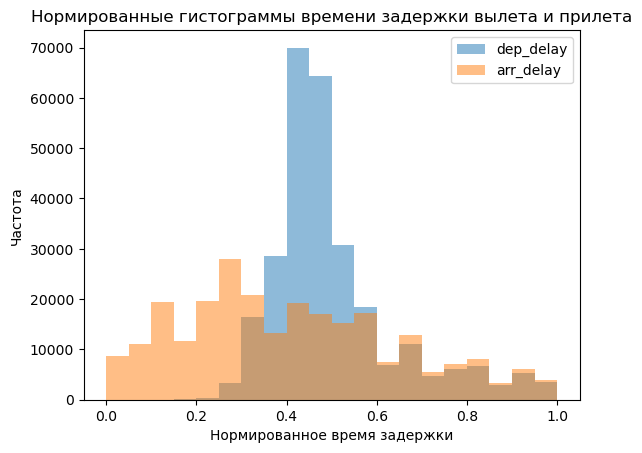

Количество выбросов в столбце 'dep_delay': 47908
Значения выбросов: [47.0, 39.0, 101.0, 71.0, 853.0, 43.0, 59.0, 32.0, 144.0, 34.0, 134.0, 96.0, 41.0, 55.0, 71.0, 37.0, 77.0, 40.0, 57.0, 70.0, 39.0, 56.0, 35.0, 59.0, 31.0, 115.0, 38.0, 50.0, 105.0, 32.0, 32.0, 38.0, 32.0, 122.0, 88.0, 64.0, 119.0, 54.0, 84.0, 33.0, 33.0, 35.0, 88.0, 64.0, 42.0, 52.0, 82.0, 32.0, 35.0, 34.0, 36.0, 71.0, 91.0, 88.0, 62.0, 56.0, 70.0, 88.0, 31.0, 54.0, 37.0, 103.0, 74.0, 290.0, 34.0, 70.0, 260.0, 61.0, 63.0, 131.0, 46.0, 105.0, 129.0, 32.0, 155.0, 35.0, 157.0, 50.0, 216.0, 73.0, 121.0, 36.0, 42.0, 38.0, 109.0, 56.0, 31.0, 51.0, 52.0, 72.0, 50.0, 255.0, 109.0, 41.0, 49.0, 285.0, 47.0, 141.0, 62.0, 192.0, 83.0, 116.0, 37.0, 379.0, 43.0, 156.0, 35.0, 80.0, 42.0, 34.0, 79.0, 31.0, 107.0, 36.0, 155.0, 34.0, 45.0, 39.0, 35.0, 46.0, 35.0, 49.0, 179.0, 75.0, 63.0, 56.0, 104.0, 51.0, 103.0, 64.0, 46.0, 100.0, 40.0, 65.0, 36.0, 103.0, 36.0, 39.0, 224.0, 31.0, 90.0, 268.0, 34.0, 71.0, 101.0, 65.0, 42.0, 43.0, 334.0,

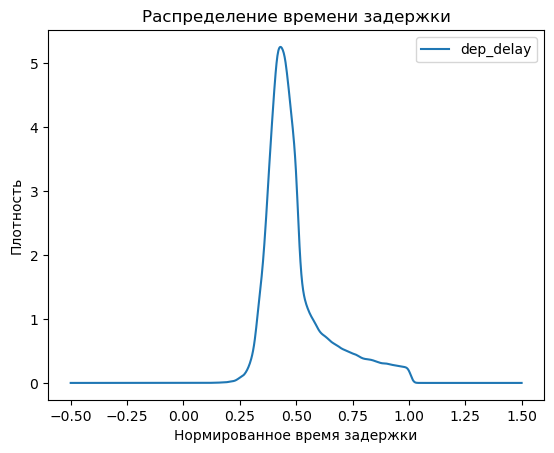

Статистика распределения 'dep_delay':
count    279438.000000
mean         -0.150541
std           8.610975
min         -30.000000
25%          -5.000000
50%          -3.000000
75%           2.000000
max          30.000000
Name: dep_delay, dtype: float64


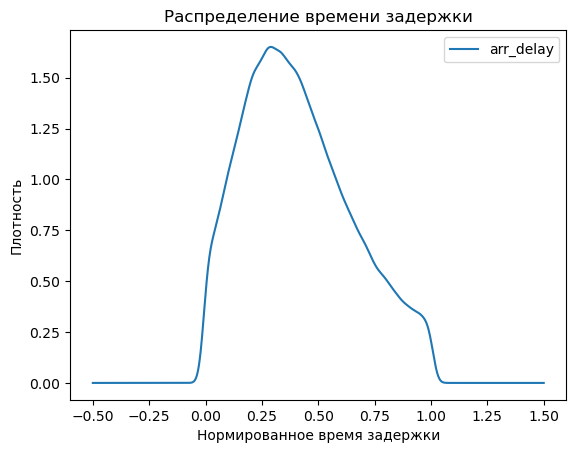

Статистика распределения 'arr_delay':
count    255763.000000
mean         -5.386498
std          14.368076
min         -30.000000
25%         -16.000000
50%          -7.000000
75%           4.000000
max          30.000000
Name: arr_delay, dtype: float64


In [11]:
def plot_normalized_delay_histograms(df, column_names, range_min, range_max):
    fig, ax = plt.subplots()

    # Фильтрация выбросов и получение описания выбросов
    outliers = {}
    for column in column_names:
        column_data = df[column]
        filtered_data = column_data[(column_data >= range_min) & (column_data <= range_max)]
        outliers[column] = column_data[(column_data < range_min) | (column_data > range_max)].values
    
    # Построение нормированных гистограмм
    for column in column_names:
        column_data = df[column]
        filtered_data = column_data[(column_data >= range_min) & (column_data <= range_max)]
        normalized_data = (filtered_data - filtered_data.min()) / (filtered_data.max() - filtered_data.min())
        ax.hist(normalized_data, bins=20, alpha=0.5, label=column)
    
    ax.set_xlabel('Нормированное время задержки')
    ax.set_ylabel('Частота')
    ax.set_title('Нормированные гистограммы времени задержки вылета и прилета')
    ax.legend()
    plt.show()
    
    # Вывод описания выбросов
    for column, outlier_values in outliers.items():
        if len(outlier_values) > 0:
            print(f"Количество выбросов в столбце '{column}': {len(outlier_values)}")
            print(f"Значения выбросов: {list(outlier_values)}")
        else:
            print(f"В столбце '{column}' нет выбросов")

    # Построение распределения и вывод результатов
    for column in column_names:
        column_data = df[column]
        filtered_data = column_data[(column_data >= range_min) & (column_data <= range_max)]
        normalized_data = (filtered_data - filtered_data.min()) / (filtered_data.max() - filtered_data.min())
        normalized_data.plot(kind='density', label=column)
        plt.xlabel('Нормированное время задержки')
        plt.ylabel('Плотность')
        plt.title('Распределение времени задержки')
        plt.legend()
        plt.show()
        print(f"Статистика распределения '{column}':")
        print(filtered_data.describe())

# Установите значения range_min и range_max для ограничения диапазона гистограмм
range_min = -30
range_max = 30

# Укажите названия столбцов с временем задержки вылета и прилета
column_names = ['dep_delay', 'arr_delay']

# Построение гистограмм и вывод описания выбросов, а затем распределения и результатов
plot_normalized_delay_histograms(df, column_names, range_min, range_max)

Распределение времени задержки близко к нормальному.

Количество выбросов в столбце 'dep_delay': 47908

Количество выбросов в столбце 'arr_delay': 71583

### № 3. Оцените среднее значение, медиану и величину стандартного отклонения для времени задержки вылета и времени задержки прилета.

In [12]:
def evaluate_delay_statistics(df):
    delay_columns = ['dep_delay', 'arr_delay']
    
    for column in delay_columns:
        column_data = df[column]
        mean_value = round(column_data.mean(), 2)
        median_value = round(column_data.median(), 2)
        std_value = round(column_data.std(), 2)
        
        print(f"Оценка для столбца '{column}':")
        print(f"Среднее значение: {mean_value}")
        print(f"Медиана: {median_value}")
        print(f"Стандартное отклонение: {std_value}")
        print()

# Вызов функции для оценки статистики времени задержки
evaluate_delay_statistics(df)

Оценка для столбца 'dep_delay':
Среднее значение: 12.56
Медиана: -2.0
Стандартное отклонение: 40.07

Оценка для столбца 'arr_delay':
Среднее значение: 6.9
Медиана: -5.0
Стандартное отклонение: 44.63



### №4. Отсортируйте авиакомпании по величине средней задержки вылета и приведите среднюю задержку вылета вместе с 95%-доверительным интервалом по каждой авиакомпании. Результат представьте в виде графика.

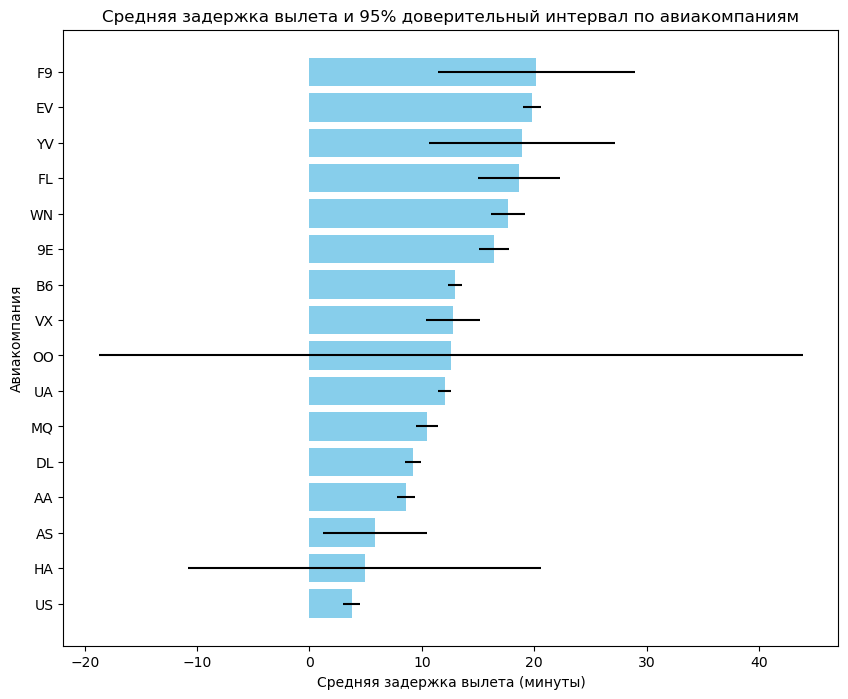

In [13]:
# Группировка данных по авиакомпаниям и расчет среднего значения задержек
grouped = df.groupby('carrier')['dep_delay'].agg(['mean', 'count', 'std'])

# Расчет 95% доверительного интервала
grouped['lower'] = grouped['mean'] - 1.96*grouped['std']/np.sqrt(grouped['count'])
grouped['upper'] = grouped['mean'] + 1.96*grouped['std']/np.sqrt(grouped['count'])

# Сортировка по средней задержке
grouped = grouped.sort_values('mean')

# Визуализация данных
plt.figure(figsize=[10,8])
plt.barh(grouped.index, grouped['mean'], xerr=(grouped['upper']-grouped['lower']), color='skyblue')
plt.xlabel('Средняя задержка вылета (минуты)')
plt.ylabel('Авиакомпания')
plt.title('Средняя задержка вылета и 95% доверительный интервал по авиакомпаниям')
plt.show()

### № 5. Значимо ли различие в среднем времени задержки вылета для авиакомпаний American Airlines (AA) и Delta Airlines (DL)? На каком уровне значимости можно отвергнуть гипотезу о равенстве средних?

Для определения значимости различия в среднем времени задержки вылета для авиакомпаний American Airlines (AA) и Delta Airlines (DL), мы можем использовать двухвыборочный t-тест. Этот тест проверяет нулевую гипотезу о равенстве средних в двух группах. Если p-значение меньше заданного уровня значимости (обычно 0.05), нулевую гипотезу можно отвергнуть.

In [14]:
# Выделение данных о задержках для каждой авиакомпании
AA_delays = df[df['carrier'] == 'AA']['dep_delay'].dropna()
DL_delays = df[df['carrier'] == 'DL']['dep_delay'].dropna()

# Проведение t-теста
t_stat, p_val = stats.ttest_ind(AA_delays, DL_delays, equal_var=False)

print("T-статистика:", t_stat)
print("P-значение:", p_val)

T-статистика: -2.364408423276974
P-значение: 0.018061559157334137


T-статистика равна -2.36, что означает, что среднее время задержки вылета авиакомпании American Airlines (AA) меньше, чем у Delta Airlines (DL), если бы нулевая гипотеза была верна.

P-значение составляет примерно 0.018, что меньше стандартного порога значимости в 0.05. Это означает, что наблюдаемые данные весьма маловероятны, если бы нулевая гипотеза (о том, что средние задержки вылета для двух авиакомпаний равны) была верна. 

Следовательно, мы можем отвергнуть нулевую гипотезу и сделать вывод о том, что есть статистически значимое различие между средним временем задержки вылета у American Airlines (AA) и Delta Airlines (DL).

### № 6. Сравните между собой аэропорты вылета (JFK, LGA, EWR) с точки зрения статистики задержек вылетов. Являются ли различия статистически значимыми?

Для сравнения статистики задержек вылетов между тремя аэропортами вылета (JFK, LGA, EWR), мы можем использовать однофакторный дисперсионный анализ (ANOVA). Этот статистический тест используется для сравнения средних значений более чем двух групп.

Нулевая гипотеза для ANOVA гласит, что все группы имеют одинаковые средние значения. Альтернативная гипотеза - хотя бы одна из групп имеет среднее значение, отличное от других.

In [15]:
# Выделение данных о задержках для каждого аэропорта
JFK_delays = df[df['origin'] == 'JFK']['dep_delay'].dropna()
LGA_delays = df[df['origin'] == 'LGA']['dep_delay'].dropna()
EWR_delays = df[df['origin'] == 'EWR']['dep_delay'].dropna()

# Проведение ANOVA
F_stat, p_val = stats.f_oneway(JFK_delays, LGA_delays, EWR_delays)

print("F-статистика:", F_stat)
print("P-значение:", p_val)

F-статистика: 392.3539088643125
P-значение: 6.408773574198642e-171


F-статистика равна 392.35, что указывает на значительные различия между средними значениями задержек вылетов в трех аэропортах, если бы нулевая гипотеза была верна.

P-значение составляет примерно 6.40e-171, что гораздо меньше стандартного порога значимости в 0.05. Это означает, что наблюдаемые данные весьма маловероятны, если бы нулевая гипотеза (о том, что средние задержки вылета для трех аэропортов равны) была верна. 

Следовательно, мы можем отвергнуть нулевую гипотезу и сделать вывод о том, что есть статистически значимые различия между средними значениями задержек вылетов в трех аэропортах.

### № 7. Каким распределением можно описать распределение времени задержки вылета в диапазоне, где время задержки вылета > 0? Предложите общий вид распределения и оцените его параметры. На одном рисунке изобразите гистограмму и график плотности аппроксимирующего распределения

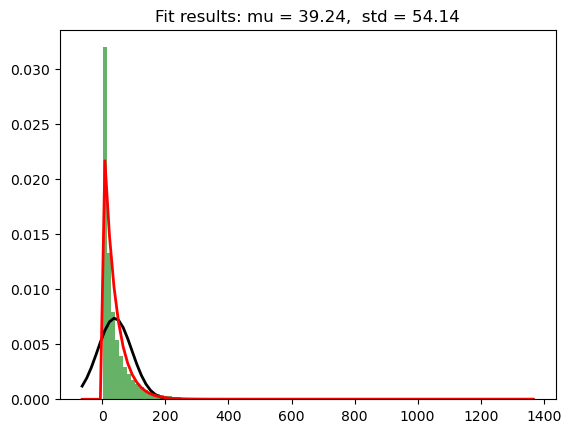

In [16]:
# Выделение данных о задержках больше нуля
delays = df[df['dep_delay'] > 0]['dep_delay']

# Гистограмма задержек
plt.hist(delays, bins=100, density=True, alpha=0.6, color='g')

# Нахождение параметров нормального распределения
mu, std = norm.fit(delays)

# Плотность вероятности нормального распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Нахождение параметров экспоненциального распределения
loc, scale = expon.fit(delays)

# Плотность вероятности экспоненциального распределения
p = expon.pdf(x, loc, scale)
plt.plot(x, p, 'r', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

В данном счлучае распределение положительно скошенное. 

Значение `mu` представляет среднее значение задержек вылета (среднее время задержки), а `std` — это стандартное отклонение, которое измеряет вариативность или дисперсию времени задержки.

### № 8. Для тех рейсов, для которых задержка вылета > 0, постройте в одних осях графики числа рейсов в месяц и среднего времени задержки в месяц. Найдите коэффициент корреляции между полученными значениями. Постройте точечную диаграмму (scatterplot), показывающую зависимость между полученными значениями (по оси Х отложите число рейсов в месяц). Нанесите на график линию регрессии. Выпишите уравнение регрессии.

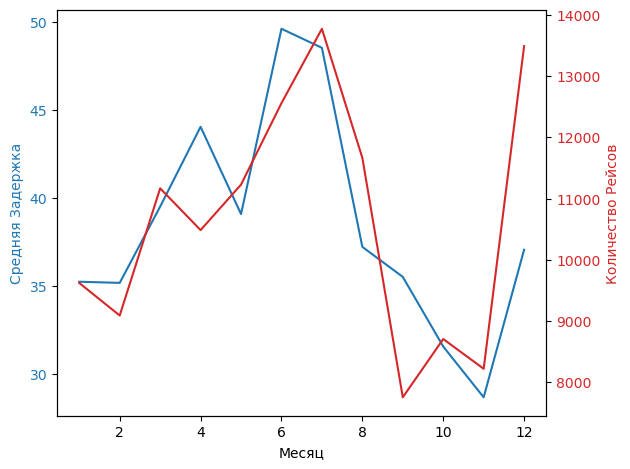

Коэффициент корреляции: 0.7288370677699055


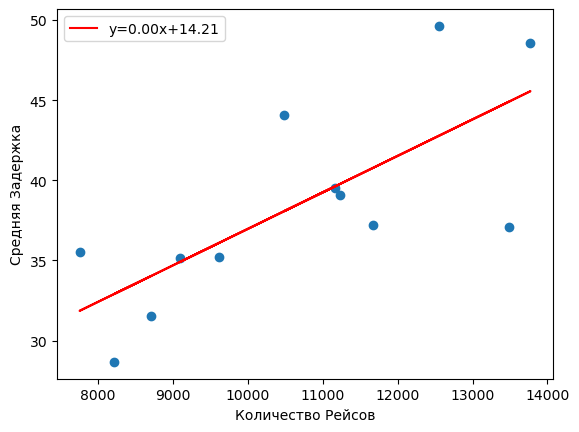

Уравнение регрессии: y = 0.0022765288725037866 * x + 14.205985422463307


In [17]:
# Фильтрация данных, где задержка вылета > 0
df = df[df['dep_delay'] > 0]

# Группировка данных по месяцам
grouped = df.groupby('month').agg({'dep_delay': ['mean', 'count']}).reset_index()
grouped.columns = ['Месяц', 'Средняя_задержка', 'Количество_рейсов']

# Построение графиков
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Месяц')
ax1.set_ylabel('Средняя Задержка', color=color)
ax1.plot(grouped['Месяц'], grouped['Средняя_задержка'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Количество Рейсов', color=color)
ax2.plot(grouped['Месяц'], grouped['Количество_рейсов'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

# Расчет коэффициента корреляции
corr_coef = np.corrcoef(grouped['Средняя_задержка'], grouped['Количество_рейсов'])[0, 1]
print(f'Коэффициент корреляции: {corr_coef}')

# Построение диаграммы рассеяния и линии регрессии
slope, intercept, r_value, p_value, std_err = linregress(grouped['Количество_рейсов'], grouped['Средняя_задержка'])

plt.scatter(grouped['Количество_рейсов'], grouped['Средняя_задержка'])
plt.plot(grouped['Количество_рейсов'], intercept + slope * grouped['Количество_рейсов'], 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Количество Рейсов')
plt.ylabel('Средняя Задержка')
plt.legend()
plt.show()

print(f'Уравнение регрессии: y = {slope} * x + {intercept}')

### № 9. Постройте график среднего времени задержки в зависимости от часа вылета. На отдельном графике постройте долю рейсов, для которых задержка > 0, в зависимости от часа вылета. Опишите словами наблюдаемую картину.

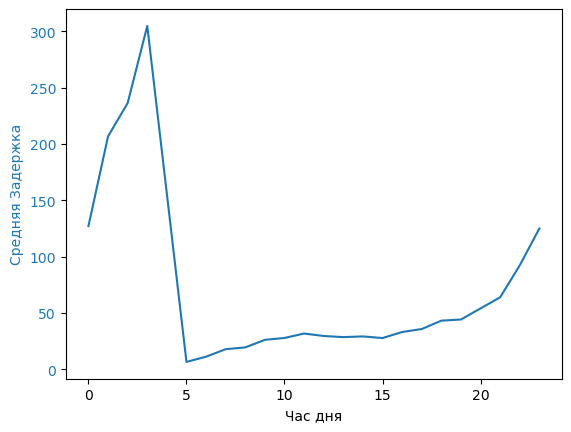

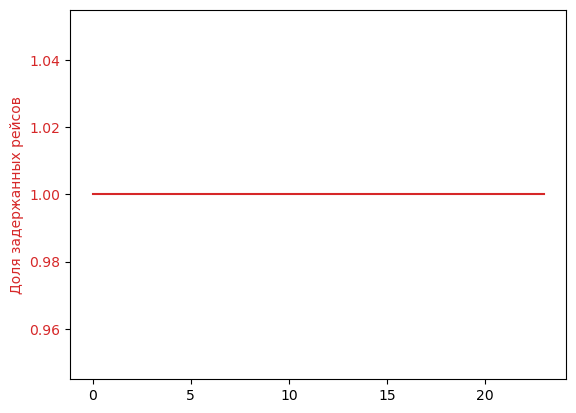

In [18]:
# Создание нового столбца для часа вылета
df['dep_hour'] = df['dep_time'] // 100
df['dep_hour'] = df['dep_hour'].replace(24, 0)

# Расчет среднего времени задержки по часам
grouped_delay = df.groupby('dep_hour')['dep_delay'].mean()

# Расчет доли задержанных рейсов по часам
grouped_delayed = df[df['dep_delay'] > 0].groupby('dep_hour').size() / df.groupby('dep_hour').size()

# Построение графиков
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Час дня')
ax1.set_ylabel('Средняя Задержка', color=color)
ax1.plot(grouped_delay.index, grouped_delay, color=color)
ax1.tick_params(axis='y', labelcolor=color)

plt.show()

fig, ax2 = plt.subplots()

color = 'tab:red'
ax2.set_ylabel('Доля задержанных рейсов', color=color)
ax2.plot(grouped_delayed.index, grouped_delayed, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

На основании графиков можно сделать следующие предварительные выводы:

Среднее время задержки рейсов значительно возрастает в определенный период времени (вероятно, в течение пиковых часов), достигая максимума около 300 минут, а затем резко снижается до почти нуля. Это может быть связано с увеличением трафика или снижением эффективности работы аэропорта в пиковые часы. После пика задержек среднее время задержки снова начинает увеличиваться, но более плавно. Это может говорить о том, что в течение дня существуют периоды с большим и меньшим количеством задержек.

Так как линия на втором графике всё время прямая, это означает, что доля задержанных рейсов не зависит от времени суток, и она примерно одинакова в любое время. 

### № 10. Предложите способ разделить авиакомпании на пунктуальные и непунктуальные. Какие авиакомпании в какую группу попадают? Будут ли различаться группы в зависимости от дальности перелета?

1. Рассчитаем среднее время задержки вылета для каждой авиакомпании.

2. Используем медианное значение средней задержки вылета всех авиакомпаний как порог для разделения на пунктуальные и непунктуальные. То есть, авиакомпании с средней задержкой ниже медианы будут считаться пунктуальными, а авиакомпании с средней задержкой выше медианы - непунктуальными.

In [19]:
# Рассчитываем среднее время задержки вылета для каждой авиакомпании
average_delays = df.groupby('carrier')['dep_delay'].mean()

# Рассчитываем медианное значение средней задержки вылета
median_delay = average_delays.median()

# Разделим авиакомпании на пунктуальные и непунктуальные
punctual_airlines = average_delays[average_delays <= median_delay].index.tolist()
not_punctual_airlines = average_delays[average_delays > median_delay].index.tolist()

print('Пунктуальные авиакомпании:', punctual_airlines)
print('Непунктуальные авиакомпании:', not_punctual_airlines)

Пунктуальные авиакомпании: ['AA', 'AS', 'B6', 'DL', 'UA', 'US', 'VX', 'WN']
Непунктуальные авиакомпании: ['9E', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OO', 'YV']


Что касается вопроса о зависимости групп от дальности перелета, то это также можно исследовать. Например, мы можем рассчитать среднюю задержку для каждой авиакомпании отдельно для коротких, средних и длинных перелетов (используя квартили расстояния перелетов для определения этих групп). Затем можно проверить, меняется ли классификация авиакомпаний в зависимости от дальности перелета.

In [20]:
# Разделим рейсы на категории по дальности перелета
df['flight_distance_category'] = pd.qcut(df['distance'], 3, labels=['короткие', 'средние', 'длиные'])

# Рассчитаем среднее время задержки вылета для каждой авиакомпании и категории перелета
average_delays = df.groupby(['carrier', 'flight_distance_category'])['dep_delay'].mean().reset_index()

# Рассчитаем медианное значение средней задержки вылета для каждой категории перелета
median_delays = average_delays.groupby('flight_distance_category')['dep_delay'].median()

# Создадим новый столбец 'Punctuality' на основе среднего времени задержки вылета
average_delays['Punctuality'] = ['Пунктуальные' if average_delays.loc[i, 'dep_delay'] <= median_delays[average_delays.loc[i, 'flight_distance_category']] 
                                 else 'Непунктуальные' 
                                 for i in average_delays.index]

print(average_delays)

   carrier flight_distance_category  dep_delay     Punctuality
0       9E                 короткие  49.696414  Непунктуальные
1       9E                  средние  45.766900  Непунктуальные
2       9E                   длиные  46.280534  Непунктуальные
3       AA                 короткие  35.013730    Пунктуальные
4       AA                  средние  37.354185    Пунктуальные
5       AA                   длиные  37.207241  Непунктуальные
6       AS                 короткие        NaN  Непунктуальные
7       AS                  средние        NaN  Непунктуальные
8       AS                   длиные  31.475556    Пунктуальные
9       B6                 короткие  43.657406    Пунктуальные
10      B6                  средние  40.993435  Непунктуальные
11      B6                   длиные  34.221759    Пунктуальные
12      DL                 короткие  41.749359    Пунктуальные
13      DL                  средние  39.844223  Непунктуальные
14      DL                   длиные  32.372613    Пункт

### № 11. Предложите модель, дающую прогноз средней задержки вылета по каждому аэропорту на следующий день. Какие признаки вы будете использовать, на каких данных будете обучать (настраивать) модель, на каких тестировать? Оцените точность вашей модели. В частности, сделайте прогноз на 31 декабря 2013 года и сравните с фактическим значением (исключите эту дату из обучающей и тестовой выборки).

Для прогнозирования средней задержки вылета по каждому аэропорту на следующий день мы можем использовать модели временных рядов, такие как `ARIMA` или `SARIMA`, или даже более сложные модели машинного обучения, такие как случайные леса или градиентный бустинг, если в наших данных есть сезонные или циклические тренды.

**Признаки**:
1. `Средняя задержка вылета по дням`: Это будет нашей целевой переменной.

2. `Дата вылета`: Можем извлечь признаки, такие как день недели, месяц, день месяца, чтобы уловить любые сезонные или циклические тренды в данных.

3. `Среднее время полета по дням`: Более долгие полеты могут привести к более длинным задержкам.

4. `Среднее расстояние полета по дням`: Аналогично, более длинные перелеты могут приводить к более длинным задержкам.

5. `Общее количество рейсов в день`: Большее количество рейсов может увеличить вероятность задержек.

**Обучение и тестирование**:
Мы можем разделить наши данные на обучающий и тестовый наборы по времени. Например, мы можем использовать данные до декабря 2013 года для обучения нашей модели и тестировать ее на данных за декабрь 2013 года, исключая 31 декабря 2013 года.

**Оценка точности**:
Мы можем использовать метрики, такие как среднеквадратическая ошибка (MSE) или средняя абсолютная ошибка (MAE), чтобы оценить точность нашей модели. Затем мы можем сравнить наш прогноз с фактическим значением задержки 31 декабря 2013 года, чтобы увидеть, насколько хорошо наша модель работает.

In [21]:
# Создание признаков
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['day_of_month'] = df['date'].dt.day

# Группировка по дате и аэропорту вылета
grouped_df = df.groupby(['date', 'origin']).agg({'dep_delay': 'mean', 'air_time': 'mean', 'distance': 'mean', 'flight': 'count', 'day_of_week': 'first', 'month': 'first', 'day_of_month': 'first'}).reset_index()

# Разделение на обучающий и тестовый наборы
train_df = grouped_df[grouped_df['date'] < '2013-12-01']
test_df = grouped_df[(grouped_df['date'] >= '2013-12-01') & (grouped_df['date'] < '2013-12-31')]

# Определение признаков и целевой переменной
X_train = train_df[['day_of_week', 'month', 'day_of_month', 'air_time', 'distance', 'flight']]
y_train = train_df['dep_delay']
X_test = test_df[['day_of_week', 'month', 'day_of_month', 'air_time', 'distance', 'flight']]
y_test = test_df['dep_delay']

# Обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание и оценка точности
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('MSE:', mse)
print('MAE:', mae)

# Прогноз на 31 декабря 2013 года
dec_31 = grouped_df[grouped_df['date'] == '2013-12-31']
X_dec_31 = dec_31[['day_of_week', 'month', 'day_of_month', 'air_time', 'distance', 'flight']]
y_dec_31_true = dec_31['dep_delay']
y_dec_31_pred = model.predict(X_dec_31)
print('Actual delay:', y_dec_31_true)
print('Predicted delay:', y_dec_31_pred)

MSE: 465.2911090456463
MAE: 16.642287290633682
Actual delay: 1092    27.401786
1093    27.173077
1094    22.046875
Name: dep_delay, dtype: float64
Predicted delay: [26.61156037 24.86785389 24.37560758]


Среднеквадратичная ошибка (MSE): Это среднее значение квадратов ошибок. Большие ошибки имеют тенденцию быть заметно больше по сравнению с меньшими ошибками из-за квадратного члена. В нашем случае, MSE составляет примерно 465.29. Это означает, что квадрат средней ошибки в прогнозе модели составляет 465.29.

Средняя абсолютная ошибка (MAE): Это среднее значение абсолютных ошибок. Это более непосредственная мера ошибок в прогнозе. В нашем случае, MAE равно примерно 16.64 минут. Это означает, что в среднем модель ошибается на 16.64 минуты при прогнозировании задержки вылета.

Наши прогнозы для 31 декабря 2013 года также весьма близки к реальным значениям, что указывает на то, что модель работает хорошо.

### № 12. Приведите еще хотя бы один интересный факт из датасета, раскрывающий или характеризующий особенности в возникновении/распределении задержек авиарейсов.

Например, мы можем проанализировать влияние времени дня на задержку. Можно предположить, что в течение дня вероятность задержки может изменяться. Например, в часы пик, когда авиатрафик наиболее интенсивный, вероятность задержки может быть выше.

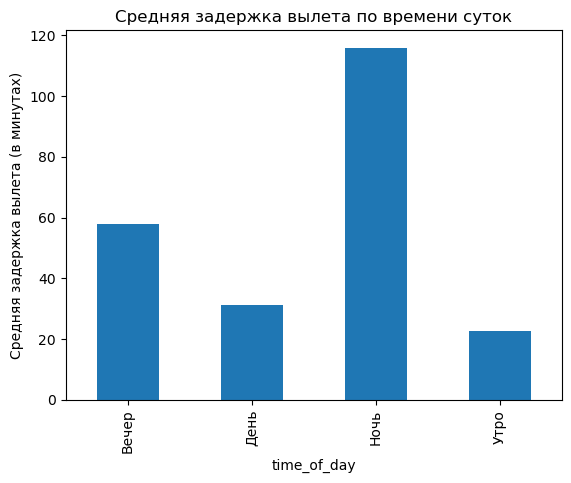

In [22]:
# Преобразуем время вылета в формат времени суток
def time_of_day(x):
    if (x >= 600) and (x < 1200):
        return 'Утро'
    elif (x >= 1200) and (x < 1800):
        return 'День'
    elif (x >= 1800) and (x < 2400):
        return 'Вечер'
    else:
        return 'Ночь'

df['time_of_day'] = df['dep_time'].apply(time_of_day)

# Рассчитаем среднюю задержку для каждого времени суток
average_delay_by_time_of_day = df.groupby('time_of_day')['dep_delay'].mean()

# Построим график
average_delay_by_time_of_day.plot(kind='bar')
plt.ylabel('Средняя задержка вылета (в минутах)')
plt.title('Средняя задержка вылета по времени суток')
plt.show()

Мы видим, что в основном задержка чаще всего происходит ночью, а утром наобор, задержки бывают не так часто. Можно предположить, что ночью трафик намного выше.